In [1]:
!python3 setup.py develop --no_cuda_ext

fatal: detected dubious ownership in repository at '/denisrtyhb/ImageEnchancer/KBNet'
To add an exception for this directory, call:

	git config --global --add safe.directory /denisrtyhb/ImageEnchancer/KBNet
/usr/lib/python3/dist-packages/setuptools/dist.py:481: UserWarning: The version specified ('1.2.0+') is an invalid version, this may not work as expected with newer versions of setuptools, pip, and PyPI. Please see PEP 440 for more details.
  warnings.warn(
running develop
running egg_info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing top-level names to basicsr.egg-info/top_level.txt
reading manifest file 'basicsr.egg-info/SOURCES.txt'
writing manifest file 'basicsr.egg-info/SOURCES.txt'
/usr/local/lib/python3.8/dist-packages/torch/utils/cpp_extension.py:500: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(ms

In [2]:
import os 
os.listdir()

['config.py',
 '.gitignore',
 'setup.cfg',
 'dockerscripts.sh',
 'basicsr.egg-info',
 '__pycache__',
 'README.md',
 'KBNet_model.py',
 'LICENSE',
 'Dockerfile',
 '.git',
 'figs',
 'Deraining',
 '.ipynb_checkpoints',
 'VERSION',
 'Denoising',
 'setup.py',
 '.eggs',
 'basicsr',
 'requirements.txt',
 'Defocus_Deblurring',
 'KBNet.ipynb']

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
cd Denoising

/denisrtyhb/ImageEnchancer/KBNet/Denoising


In [64]:
from PIL import Image
from torchvision import transforms
dataset = FolderDenoisingDataset("Datasets/val/SIDD/input_crops/")
for i in dataset:
    print(i)
    break

Datasets/val/SIDD/input_crops/0028-0008.png
1


In [45]:
dataset.output_folder is None

True

In [72]:
!python3 -u test_anything.py \
    --yml Options/sidd.yml \
    --input_dir Datasets/test/SIDD/ \
    --true_answer_dir Datasets/test/SIDD/ \
    # --input_dir Datasets/myfiles/ \
    # --true_answer_dir Datasets/test/SIDD/

** Options/sidd.yml pretrained_models/sidd.pth
===>Testing using weights: 
loaded mat at Datasets/test/SIDD/ValidationNoisyBlocksSrgb.mat
loaded mat at Datasets/test/SIDD/ValidationGtBlocksSrgb.mat
  1%|▎                                        | 10/1280 [00:03<06:54,  3.07it/s]
sidd psnr 41.85 ssim 0.952


In [76]:
!python3 -u test_anything.py \
    --yml Options/sidd.yml \
    --mode folder \
    --input_dir Datasets/val/SIDD/input_crops \
    --true_answer_dir Datasets/val/SIDD/target_crops
# dataset.read_image("Datasets/val/SIDD/input_crops/0028-0008.png").permute(2, 0, 1)

** Options/sidd.yml pretrained_models/sidd.pth
===>Testing using weights: 
  8%|███▏                                    | 100/1280 [00:25<05:05,  3.87it/s]
sidd psnr 39.92 ssim 0.913


In [82]:
!python3 -u test_anything.py \
    --yml Options/sidd.yml \
    --mode folder \
    --input_dir ../../Datasets/myfiles/input_crops \
    --true_answer_dir ../../Datasets/myfiles/input_crops
# dataset.read_image("Datasets/val/SIDD/input_crops/0028-0008.png").permute(2, 0, 1)

** Options/sidd.yml pretrained_models/sidd.pth
===>Testing using weights: 
100%|███████████████████████████████████████████| 76/76 [00:19<00:00,  3.84it/s]
sidd psnr 44.56 ssim 0.963


In [89]:
!python3 -u test_anything.py \
    --yml Options/sidd.yml \
    --mode folder \
    --input_dir ../../Datasets/myfiles/input \
    --true_answer_dir ../../Datasets/myfiles/input
# dataset.read_image("Datasets/val/SIDD/input_crops/0028-0008.png").permute(2, 0, 1)

** Options/sidd.yml pretrained_models/sidd.pth
===>Testing using weights: 
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.31it/s]
sidd psnr 37.42 ssim 0.973


In [7]:
# !python3 -u test_real_denoising_sidd.py --yml Options/sidd.yml

In [8]:
# !python3 -u test_real_denoising_sidd.py --yml Options/sidd.yml

In [9]:
# !python3 -u test_real_denoising_sidd.py --yml Options/sidd.yml

In [10]:
# utils_tool.__file__

In [11]:
# import os
# import yaml
# import argparse

# import numpy as np
# from tqdm import tqdm
# from skimage import img_as_ubyte
# import scipy.io as sio

# import torch
# import torch.nn as nn
# import utils_tool

# from skimage.metrics import peak_signal_noise_ratio as compare_psnr
# from skimage.metrics import structural_similarity as compare_ssim

# from basicsr.models.archs.kbnet_s_arch import KBNet_s

# try:
#     from yaml import CLoader as Loader
# except ImportError:
#     from yaml import Loader


# import matplotlib.pyplot as plt

In [12]:
# def denoise_large(model, image, patch_size=(256, 256), grid_size=(100, 100), batch_size=1):
#     sum = np.zeros_like(image)
#     cnt = np.zeros_like(image)
#     i = 0
#     small_images = []
#     coordinates = []
#     for i in range(0, image.shape[0], grid_size[0]):
#         for j in range(0, image.shape[1], grid_size[1]):
#             if i + patch_size[0] > image.shape[0]:
#                 i = image.shape[0] -  patch_size[0]
#             if j +  patch_size[1] > image.shape[1]:
#                 j = image.shape[1] - patch_size[1]
#             small_images.append(image[i:i+ patch_size[0], j:j+ patch_size[1]])
#             coordinates.append((i, j))
            
            
#             # global saved
#             # saved = (image[i:i+256, j:j+256], img)
#             # fig, ax = plt.subplots(1, 2)
#             # ax[0].imshow(image[i:i+256, j:j+256])
#             # ax[1].imshow(img)
#             # plt.show()
    
#     for i in tqdm(range(0, len(small_images), batch_size)):
#         j = min(i + batch_size, len(small_images))
#         batch = np.stack(small_images[i:j])
#         restored_patch = model(batch)

#         for small_image, (x, y) in zip(restored_patch, coordinates[i:j]):
#             sum[x:x+ patch_size[0], y:y+ patch_size[1]] += small_image
#             cnt[x:x+ patch_size[0], y:y+ patch_size[1]] += 1
        
#     cnt[cnt == 0] = 1
#     return sum / cnt

In [13]:
# def add_gaussian_noise(X_img, var=1):
#     gaussian = np.random.normal(loc=0.0, scale=var, size=(X_img.shape[0], X_img.shape[1], 1))
#     gaussian = np.concatenate((gaussian, gaussian, gaussian), axis=2)
#     gaussian_img = X_img + var * gaussian
#     return gaussian_img

In [14]:
# def before_and_after(before, after, figsize=(16, 8)):
#     fig, ax = plt.subplots(1, 2, figsize=figsize)
#     ax[0].imshow(before)
#     ax[0].set_title("Before")
#     ax[0].axis('off')
#     ax[1].imshow(after)
#     ax[1].set_title("After")
#     ax[1].axis('off')
#     plt.show()

In [9]:
# from KBNet_model import KBNet_model, KBNet_config
# config = KBNet_config()
# model = KBNet_model(KBNet_config(), 'cuda:0')

100%|███████████████████████████████████████████████████████████████████████████████████| 44/44 [00:28<00:00,  1.54it/s]


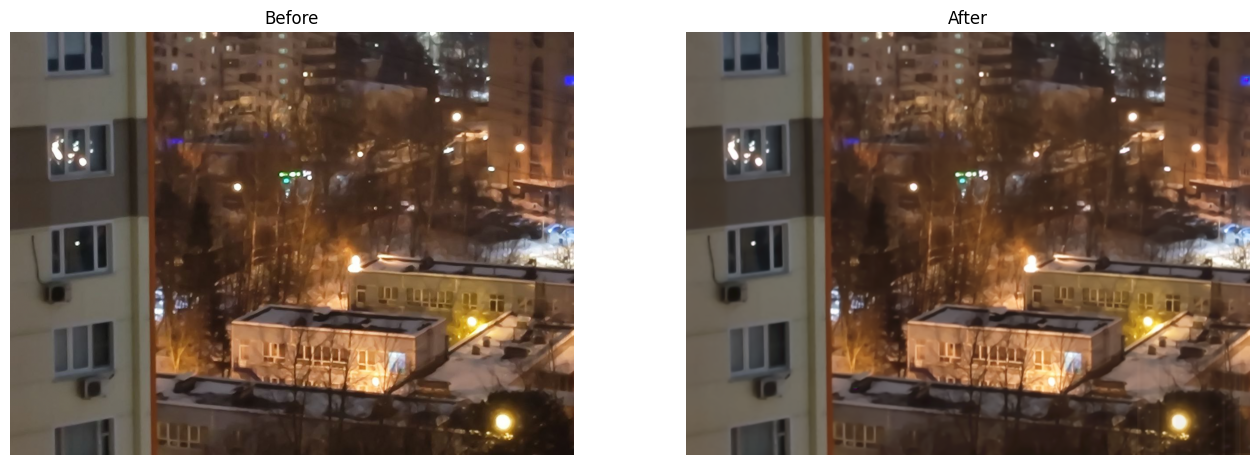

In [11]:


# file_ = "Datasets/image3.jpg"
# image = utils_tool.load_img(file_) / 255
# # image = np.clip(add_gaussian_noise(image, var=0.2), 0, 1)
# image_restored = denoise_large(model, image, batch_size=3)

# before_and_after(image, image_restored)

# # print(np.max(np.abs(image-image_restored)))
# # plt.imshow(image)
# # plt.axis('off')
# # plt.show()
# # plt.imshow(image_restored)
# # plt.axis('off')
# # plt.show()

In [58]:

# import torch
# import torchvision.models as models
# from collections import OrderedDict
# import numpy as np
# # model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

# model = models.resnet18(pretrained=True)
# new_model = torch.nn.Sequential(OrderedDict([*(list(model.named_children())[:-1])]))
# new_model.eval()

# def to_tensor(img):
#     return torch.from_numpy(np.expand_dims(img, 0).transpose(0, 3, 1, 2)).to(torch.float)
    
# def resnet_sim(image1, image2):
#     with torch.no_grad():
#         embed1 = new_model(to_tensor(image1))
#         embed2 = new_model(to_tensor(image2))
#         return np.square(embed1 - embed2).sum().item()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [57]:
# # to_tensor(image).shape

# # a, b = [torch.rand((1, 3, 960, 1280)) for i in range(2)]
# # resnet_sim(a, b)
# torch.tensor([1]).item()

1

ModuleNotFoundError: No module named 'torcheval'

In [120]:
# (resnet_sim(np.random.rand(256, 256, 3), np.random.rand(256, 256, 3)),
#     resnet_sim(image, image_restored))

(1.4828332662582397, 0.21938058733940125)

In [59]:
# def psnr(image1, image2):
#     mse = np.sqrt(np.square(image1 - image2).mean())
#     mx = np.max(image2)
#     return 20 * np.log10(mx / mse)

In [92]:
# from itertools import combinations
# n = 10
# trash = [add_gaussian_noise(image, 0.1) for i in range(n)]
# d1 = []
# d2 = []
# for i, j in tqdm(combinations(trash, 2)):
#     d1.append(psnr(i, j))
#     d2.append(resnet_sim(i, j))
# d1_mean = (np.mean(d1), np.std(d1))
# d2_mean = (np.mean(d2), np.std(d2))

45it [00:07,  6.02it/s]


In [93]:
# d2

[0.19136643409729004,
 0.208199143409729,
 0.19343020021915436,
 0.20344802737236023,
 0.21252447366714478,
 0.18401961028575897,
 0.20170938968658447,
 0.19455474615097046,
 0.20438453555107117,
 0.1946621537208557,
 0.16150355339050293,
 0.18137982487678528,
 0.18094474077224731,
 0.17868532240390778,
 0.15902213752269745,
 0.18451549112796783,
 0.1908581554889679,
 0.19556330144405365,
 0.20081233978271484,
 0.20368829369544983,
 0.1999770551919937,
 0.1862657368183136,
 0.20900321006774902,
 0.19203300774097443,
 0.1811332106590271,
 0.2083989679813385,
 0.18540750443935394,
 0.16560883820056915,
 0.2117614448070526,
 0.1820342093706131,
 0.1879161149263382,
 0.1960018277168274,
 0.18615448474884033,
 0.20236802101135254,
 0.2000882625579834,
 0.21427074074745178,
 0.19895413517951965,
 0.20481526851654053,
 0.22098559141159058,
 0.1874358206987381,
 0.1881309449672699,
 0.20259514451026917,
 0.19396641850471497,
 0.18330416083335876,
 0.19816577434539795]

In [94]:
# d1 = []
# d2 = []
# for i in tqdm(trash):
#     d1.append(psnr(i, image))
#     d2.append(resnet_sim(i, image))
# print((np.mean(d1) - d1_mean[0]) / d1_mean[1])
# print((np.mean(d2) - d2_mean[0]) / d2_mean[1])

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.98it/s]

97.57784968741483
3.8732270857438538


In [95]:
# d2

[0.22451603412628174,
 0.23803246021270752,
 0.23180937767028809,
 0.24240370094776154,
 0.25724735856056213,
 0.25675010681152344,
 0.2450641393661499,
 0.2473304718732834,
 0.25716477632522583,
 0.2455420196056366]

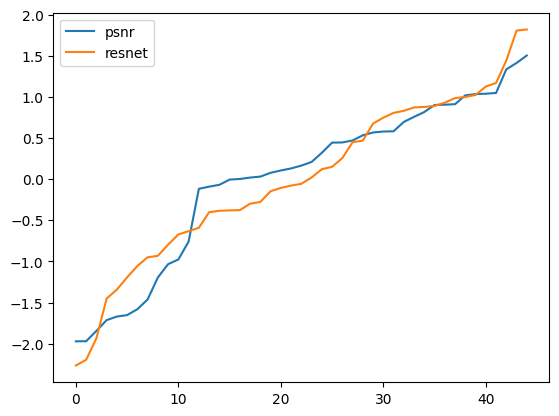

In [82]:
# def norm(d):
#     d = np.array(sorted(d))
#     d = (d - d.mean()) / np.std(d)
#     return d
# plt.plot(norm(d1), label='psnr')
# plt.plot(norm(d2), label='resnet')
# plt.legend()

In [97]:
# noisy1 = add_gaussian_noise(image, 0.1)
# noisy2 = add_gaussian_noise(image, 0.1)

# for metric in [psnr, resnet_sim]:
#     print(metric(noisy1, image))
#     print(metric(noisy2, image))
#     print(metric(noisy1, noisy2))
    
#     print(metric(image, image_restored))
#     print(metric(noisy1, image_restored))
#     print(metric(noisy2, image_restored))

#     print("\n\n")

39.99939754208182
39.99667681741262
37.29405577900175
38.9338993398906
36.42208802962466
36.42771626861681



0.21707618236541748
0.23397666215896606
0.19531258940696716
0.21938058733940125
0.2553822994232178
0.2774559259414673





In [15]:

# import cv2
# def save_jpg(path, img):
#     img = img.astype('uint8')
#     if path[-4:] != '.jpg':
#         print('jpg path error', path)
#         exit()
#     cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
#     return

In [16]:
# path = '_denoised.'.join(file_.split('.'))
# save_jpg(path, image_restored * 255)
# # im.save()

In [17]:
# image.shape

(960, 1280, 3)